Merge Dataset

Import Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers=pd.read_csv(r'd:\0.data spark project 2\cleaned dataset\cleaned_Customers.csv')
sales=pd.read_csv(r'd:\0.data spark project 2\cleaned dataset\cleaned_Sales.csv')
products=pd.read_csv(r'd:\0.data spark project 2\cleaned dataset\cleaned_Products.csv')
stores=pd.read_csv(r'd:\0.data spark project 2\cleaned dataset\cleaned_Stores.csv')
exchange_rates=pd.read_csv(r'd:\0.data spark project 2\cleaned dataset\cleaned_Exchange Rates.csv')


Mergering Datasets

In [3]:
#Merge 'sales' with 'customers'
sales_customer=pd.merge(sales,customers,on='CustomerKey',how='inner')

#Merge 'sales_customer' and 'products'
sales_customer_products=pd.merge(sales_customer,products,on='ProductKey',how='inner')

#Merge 'sales_customer_products' and 'Stores'
sales_customer_products_store=pd.merge(sales_customer_products,stores,on='StoreKey',how='inner')

# Merge 'sales_customer_products_store' and 'exchange_rates'
All_dataset=pd.merge(sales_customer_products_store,exchange_rates,how='inner' , left_on=['Order Date', 'Currency Code'], right_on=['Date', 'Currency'])

#save the merged data 
All_dataset.to_csv(r'd:\0.data spark project 2\cleaned dataset\merged_datasets.csv',index=False)
print('the merged file has been saved')



the merged file has been saved


In [4]:
pd.set_option('display.max_columns',None)

#view the Dataset
merged_dataset=pd.read_csv(r'd:\0.data spark project 2\cleaned dataset\merged_datasets.csv')
merged_dataset.head(5)

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,Name,City,State_x,Zip Code,Country_x,Continent,Age,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Country_y,State_y,Square Meters,Open Date,Store_Age,Unnamed: 0,Date,Currency,Exchange
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Male,Tyler Vaught,london,Ontario,N5W 5K6,Canada,North America,53,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,2015-04-04,9,1826,2016-01-01,CAD,1.3884
1,366001,1,2016-01-01,1269051,0,1048,2,USD,Male,Frank Upchurch,auberry,California,93602,United States,North America,29,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,0.0,2010-01-01,14,1825,2016-01-01,USD,1.0000
2,366001,2,2016-01-01,1269051,0,2007,1,USD,Male,Frank Upchurch,auberry,California,93602,United States,North America,29,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,Online,Online,0.0,2010-01-01,14,1825,2016-01-01,USD,1.0000
3,366002,1,2016-01-01,266019,0,1106,7,CAD,Female,Joan Roche,red deer,Alberta,T4N 2A6,Canada,North America,62,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,0.0,2010-01-01,14,1826,2016-01-01,CAD,1.3884
4,366002,2,2016-01-01,266019,0,373,1,CAD,Female,Joan Roche,red deer,Alberta,T4N 2A6,Canada,North America,62,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,Online,Online,0.0,2010-01-01,14,1826,2016-01-01,CAD,1.3884


In [5]:
#DataSet Information
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    62884 non-null  int64  
 1   Line Item       62884 non-null  int64  
 2   Order Date      62884 non-null  object 
 3   CustomerKey     62884 non-null  int64  
 4   StoreKey        62884 non-null  int64  
 5   ProductKey      62884 non-null  int64  
 6   Quantity        62884 non-null  int64  
 7   Currency Code   62884 non-null  object 
 8   Gender          62884 non-null  object 
 9   Name            62884 non-null  object 
 10  City            62884 non-null  object 
 11  State_x         62884 non-null  object 
 12  Zip Code        62884 non-null  object 
 13  Country_x       62884 non-null  object 
 14  Continent       62884 non-null  object 
 15  Age             62884 non-null  int64  
 16  Product Name    62884 non-null  object 
 17  Brand           62884 non-null 

In [ ]:
#Drop unwanted column
merged_dataset[['Order Date','Date','Currency Code','Currency','Exchange']].sample(20)
merged_dataset.drop(['Date','Currency','Unnamed: 0'],axis=1, inplace=True)

In [8]:
#change the 'column names'
merged_dataset.rename(columns={'State_x':'customer_state','Country_x':'customer_country','Country_y':'store_country','State_y':'store_state'},inplace=True)


In [9]:
#Drop Duplicates
merged_dataset.drop_duplicates(keep='first')
len(merged_dataset)

62884

In [10]:
#Check datatypes 
merged_dataset.dtypes

Order Number          int64
Line Item             int64
Order Date           object
CustomerKey           int64
StoreKey              int64
ProductKey            int64
Quantity              int64
Currency Code        object
Gender               object
Name                 object
City                 object
customer_state       object
Zip Code             object
customer_country     object
Continent            object
Age                   int64
Product Name         object
Brand                object
Color                object
Unit Cost USD       float64
Unit Price USD      float64
SubcategoryKey        int64
Subcategory          object
CategoryKey           int64
Category             object
store_country        object
store_state          object
Square Meters       float64
Open Date            object
Store_Age             int64
Exchange            float64
dtype: object

In [17]:
#set Datatypes
merged_dataset['Order Date']=pd.to_datetime(merged_dataset['Order Date'],errors='coerce')
merged_dataset['Open Date']=pd.to_datetime(merged_dataset['Open Date'],errors='coerce')

In [19]:
#check Datatypes
merged_dataset.dtypes

Order Number                 int64
Line Item                    int64
Order Date          datetime64[ns]
CustomerKey                  int64
StoreKey                     int64
ProductKey                   int64
Quantity                     int64
Currency Code               object
Gender                      object
Name                        object
City                        object
customer_state              object
Zip Code                    object
customer_country            object
Continent                   object
Age                          int64
Product Name                object
Brand                       object
Color                       object
Unit Cost USD              float64
Unit Price USD             float64
SubcategoryKey               int64
Subcategory                 object
CategoryKey                  int64
Category                    object
store_country               object
store_state                 object
Square Meters              float64
Open Date           

In [20]:
#Check null values
merged_dataset.isnull().sum()

Order Number        0
Line Item           0
Order Date          0
CustomerKey         0
StoreKey            0
ProductKey          0
Quantity            0
Currency Code       0
Gender              0
Name                0
City                0
customer_state      0
Zip Code            0
customer_country    0
Continent           0
Age                 0
Product Name        0
Brand               0
Color               0
Unit Cost USD       0
Unit Price USD      0
SubcategoryKey      0
Subcategory         0
CategoryKey         0
Category            0
store_country       0
store_state         0
Square Meters       0
Open Date           0
Store_Age           0
Exchange            0
Total Sales USD     0
Total Profit USD    0
dtype: int64

In [21]:
merged_dataset.to_csv(r'd:\0.data spark project 2\cleaned dataset\merged_datasets.csv',index=False)
print('the file has been saved')

the file has been saved


In [10]:
pd.set_option('display.max_columns',None)

merged_dataset=pd.read_csv(r'd:\0.data spark project 2\cleaned dataset\merged_datasets.csv')
merged_dataset.head(5)


,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,Name,City,customer_state,Zip Code,customer_country,Continent,Age,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,store_country,store_state,Square Meters,Open Date,Store_Age,Exchange,Total Sales USD,Total Profit USD
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Male,Tyler Vaught,london,Ontario,N5W 5K6,Canada,North America,53,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,2015-04-04,9,1.3884,68.00,36.73
1,366001,1,2016-01-01,1269051,0,1048,2,USD,Male,Frank Upchurch,auberry,California,93602,United States,North America,29,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,0.0,2010-01-01,14,1.0000,854.00,571.06
2,366001,2,2016-01-01,1269051,0,2007,1,USD,Male,Frank Upchurch,auberry,California,93602,United States,North America,29,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,Online,Online,0.0,2010-01-01,14,1.0000,665.94,445.30
3,366002,1,2016-01-01,266019,0,1106,7,CAD,Female,Joan Roche,red deer,Alberta,T4N 2A6,Canada,North America,62,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,0.0,2010-01-01,14,1.3884,2254.00,1217.44
4,366002,2,2016-01-01,266019,0,373,1,CAD,Female,Joan Roche,red deer,Alberta,T4N 2A6,Canada,North America,62,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,Online,Online,0.0,2010-01-01,14,1.3884,326.00,159.80


In [11]:
#set Datatypes
merged_dataset['Order Date']=pd.to_datetime(merged_dataset['Order Date'],errors='coerce')
merged_dataset['Open Date']=pd.to_datetime(merged_dataset['Open Date'],errors='coerce')

In [12]:
#Add new features 'Gross profit' , 'Net profit' 
merged_dataset['Total Sales USD']=merged_dataset['Quantity'] * merged_dataset['Unit Price USD']

merged_dataset['Total Profit USD']=(merged_dataset['Unit Price USD']-merged_dataset['Unit Cost USD'])*merged_dataset['Quantity']

merged_dataset[['Product Name','Quantity','Unit Cost USD','Unit Price USD','Total Sales USD','Total Profit USD']]

,Product Name,Quantity,Unit Cost USD,Unit Price USD,Total Sales USD,Total Profit USD
0,Contoso Lens Adapter M450 White,1,31.27,68.00,68.00,36.73
1,A. Datum SLR Camera X136 Silver,2,141.47,427.00,854.00,571.06
2,Fabrikam Microwave 1.5CuFt X1100 Black,1,220.64,665.94,665.94,445.30
3,Contoso SLR Camera M146 Orange,7,148.08,322.00,2254.00,1217.44
4,Adventure Works Laptop8.9 E0890 White,1,166.20,326.00,326.00,159.80
...,...,...,...,...,...,...
62879,WWI Screen 85in E1010 White,3,70.87,139.00,417.00,204.39
62880,WWI Wireless Bluetooth Stereo Headphones M170 ...,4,55.18,120.00,480.00,259.28
62881,SV DVD 7-Inch Player Portable E200 White,2,56.08,109.99,219.98,107.82
62882,MGS Flight Simulator X M250,2,32.25,70.13,140.26,75.76


In [52]:
#Save the file after add some features
merged_dataset.to_csv(r'd:\0.data spark project 2\cleaned dataset\merged_datasets.csv',index=False)
print('the file has been saved')

the file has been saved


EDA

In [2]:
pd.set_option('display.max_columns',None)

merged_dataset=pd.read_csv(r'd:\0.data spark project 2\cleaned dataset\merged_datasets.csv')
merged_dataset.head(5)

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,Name,City,customer_state,Zip Code,customer_country,Continent,Age,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,store_country,store_state,Square Meters,Open Date,Store_Age,Exchange,Total Sales USD,Total Profit USD
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Male,Tyler Vaught,london,Ontario,N5W 5K6,Canada,North America,53,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,2015-04-04,9,1.3884,68.00,36.73
1,366001,1,2016-01-01,1269051,0,1048,2,USD,Male,Frank Upchurch,auberry,California,93602,United States,North America,29,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,0.0,2010-01-01,14,1.0000,854.00,571.06
2,366001,2,2016-01-01,1269051,0,2007,1,USD,Male,Frank Upchurch,auberry,California,93602,United States,North America,29,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,Online,Online,0.0,2010-01-01,14,1.0000,665.94,445.30
3,366002,1,2016-01-01,266019,0,1106,7,CAD,Female,Joan Roche,red deer,Alberta,T4N 2A6,Canada,North America,62,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,0.0,2010-01-01,14,1.3884,2254.00,1217.44
4,366002,2,2016-01-01,266019,0,373,1,CAD,Female,Joan Roche,red deer,Alberta,T4N 2A6,Canada,North America,62,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,Online,Online,0.0,2010-01-01,14,1.3884,326.00,159.80


In [3]:
#set Datatypes
merged_dataset['Order Date']=pd.to_datetime(merged_dataset['Order Date'],errors='coerce')
merged_dataset['Open Date']=pd.to_datetime(merged_dataset['Open Date'],errors='coerce')

In [4]:
#Dataset information
merged_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Number      62884 non-null  int64         
 1   Line Item         62884 non-null  int64         
 2   Order Date        62884 non-null  datetime64[ns]
 3   CustomerKey       62884 non-null  int64         
 4   StoreKey          62884 non-null  int64         
 5   ProductKey        62884 non-null  int64         
 6   Quantity          62884 non-null  int64         
 7   Currency Code     62884 non-null  object        
 8   Gender            62884 non-null  object        
 9   Name              62884 non-null  object        
 10  City              62884 non-null  object        
 11  customer_state    62884 non-null  object        
 12  Zip Code          62884 non-null  object        
 13  customer_country  62884 non-null  object        
 14  Continent         6288

Descrptive analysis

In [5]:

merged_dataset.describe()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Age,Unit Cost USD,Unit Price USD,SubcategoryKey,CategoryKey,Square Meters,Open Date,Store_Age,Exchange,Total Sales USD,Total Profit USD
count,6.288400e+04,62884.000000,62884,6.288400e+04,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884,62884.000000,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,2018-11-30 21:21:56.939126016,1.180797e+06,31.802144,1125.859344,3.144790,55.565613,116.253013,280.569848,450.198238,4.469611,1260.640306,2011-05-30 02:16:19.174352896,12.880940,0.992533,886.640156,519.411748
min,3.660000e+05,1.000000,2016-01-01 00:00:00,3.010000e+02,0.000000,1.000000,1.000000,22.000000,0.480000,0.950000,101.000000,1.000000,0.000000,2005-03-04 00:00:00,5.000000,0.672500,0.950000,0.470000
25%,1.121017e+06,1.000000,2018-01-25 00:00:00,6.808580e+05,8.000000,437.000000,1.000000,39.000000,22.050000,47.950000,303.000000,3.000000,840.000000,2010-01-01 00:00:00,11.000000,0.894500,115.000000,61.560000
50%,1.498016e+06,2.000000,2019-02-06 00:00:00,1.261200e+06,37.000000,1358.000000,2.000000,56.000000,79.530000,181.000000,501.000000,5.000000,1330.000000,2010-01-01 00:00:00,14.000000,1.000000,360.000000,194.440000
75%,1.788010e+06,3.000000,2019-11-23 00:00:00,1.686496e+06,53.000000,1650.000000,4.000000,72.000000,138.420000,300.000000,602.000000,6.000000,2000.000000,2013-06-07 00:00:00,14.000000,1.000000,969.000000,540.140000
max,2.243032e+06,7.000000,2021-02-20 00:00:00,2.099937e+06,66.000000,2517.000000,10.000000,89.000000,1060.220000,3199.990000,808.000000,8.000000,2105.000000,2019-03-05 00:00:00,19.000000,1.665200,31999.900000,21397.700000
std,4.532963e+05,1.365170,NaN,5.859634e+05,22.978188,709.244010,2.256371,19.408590,140.033327,382.827515,212.710652,2.132682,767.739494,NaN,2.896026,0.161601,1648.480286,1052.204029


EDA

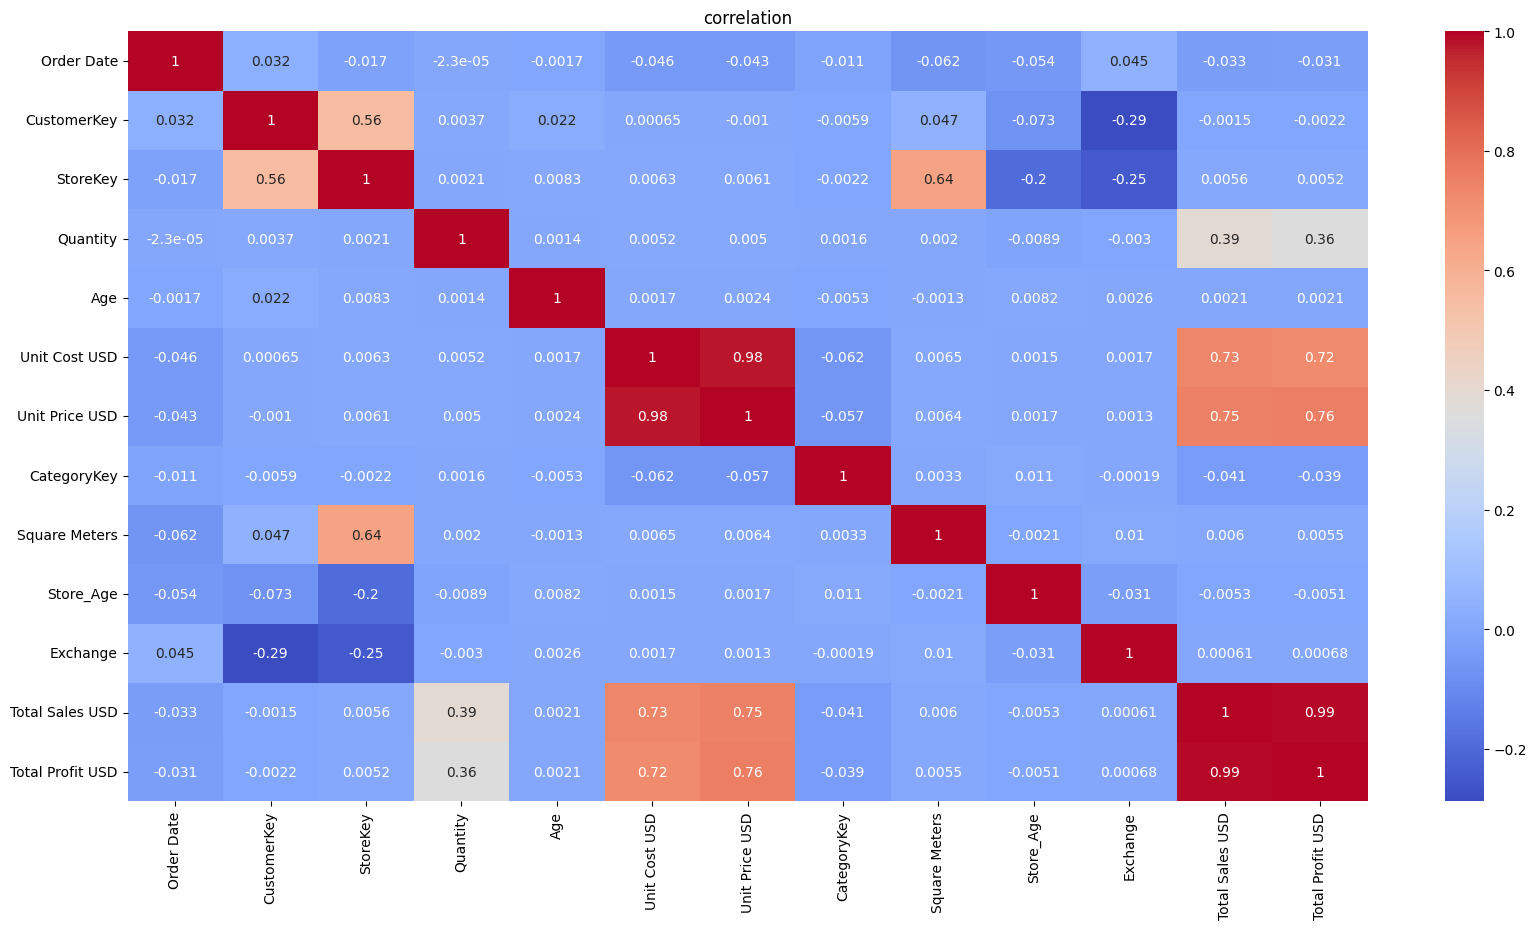

In [6]:
correlation=merged_dataset[['Order Date','CustomerKey','StoreKey','Quantity','Age','Unit Cost USD','Unit Price USD','CategoryKey','Square Meters','Store_Age','Exchange','Total Sales USD','Total Profit USD']].corr()

#plot a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('correlation')
plt.show()

In [7]:
merged_dataset.columns

Index(['Order Number', 'Line Item', 'Order Date', 'CustomerKey', 'StoreKey',
       'ProductKey', 'Quantity', 'Currency Code', 'Gender', 'Name', 'City',
       'customer_state', 'Zip Code', 'customer_country', 'Continent', 'Age',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category',
       'store_country', 'store_state', 'Square Meters', 'Open Date',
       'Store_Age', 'Exchange', 'Total Sales USD', 'Total Profit USD'],
      dtype='object')

EDA -2

Sales Analysis

optimize inventory

C:\Users\ELCOT\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


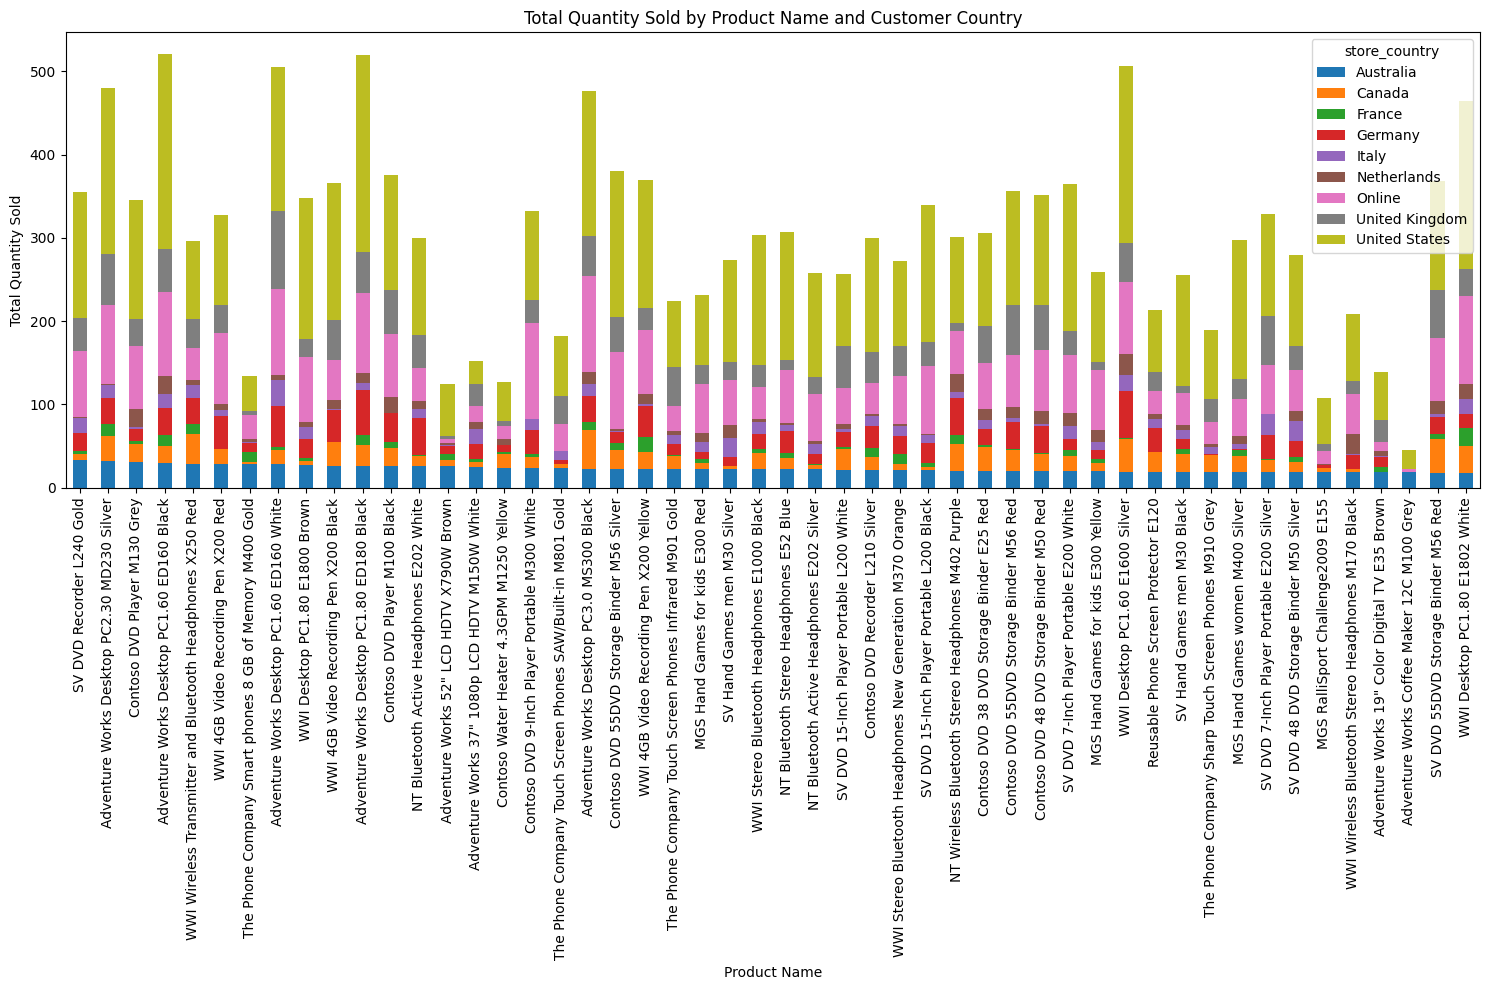

In [59]:
# Group by 'store_country' and 'Product Name', then sum the 'Quantity'
product_country_quantity = merged_dataset.groupby(['Product Name', 'store_country'])['Quantity'].sum().unstack()

# Select the top 50 products by total quantity sold
top_products = product_country_quantity.nlargest(50, product_country_quantity)

# Plot the data
top_products.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Total Quantity Sold by Product Name and Customer Country')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.legend(title='store_country')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout for better fit
plt.show()

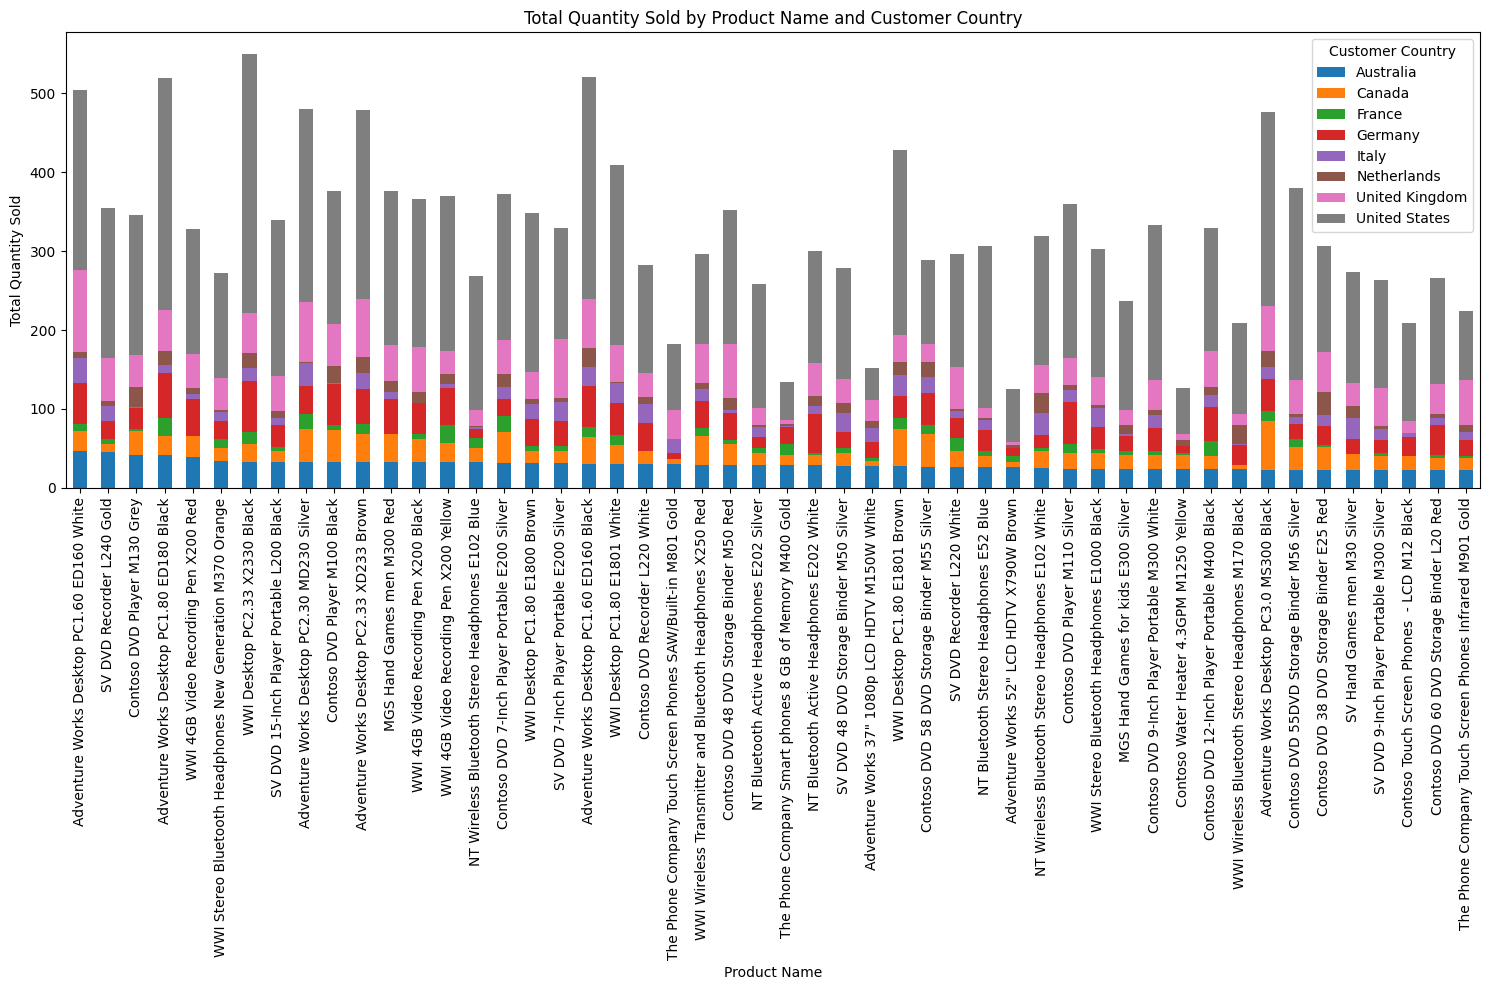

In [58]:
# Group by 'customer_country' and 'Product Name', then sum the 'Quantity'
product_country_quantity = merged_dataset.groupby(['Product Name', 'customer_country'])['Quantity'].sum().unstack()

# Select the top 50 products by total quantity sold
top_products = product_country_quantity.nlargest(50, product_country_quantity)

# Plot the data
top_products.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Total Quantity Sold by Product Name and Customer Country')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Customer Country')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout for better fit
plt.show()




In [51]:
#Sales Trends Over Time
sales_trends=merged_dataset.groupby([merged_dataset['Order Date'].dt.to_period('M'),'Product Name'])['Quantity'].sum().reset_index()
sales_trends


,Order Date,Product Name,Quantity
0,2016-01,A. Datum All in One Digital Camera M200 Grey,1
1,2016-01,A. Datum All in One Digital Camera M200 Pink,1
2,2016-01,A. Datum Bridge Digital Camera M300 Azure,8
3,2016-01,A. Datum Bridge Digital Camera M300 Pink,2
4,2016-01,A. Datum Compact Digital Camera M200 Orange,3
...,...,...,...
39207,2021-02,WWI Stereo Bluetooth Headphones New Generation...,4
39208,2021-02,WWI Wireless Bluetooth Stereo Headphones M170 ...,4
39209,2021-02,WWI Wireless Bluetooth Stereo Headphones M270 ...,6
39210,2021-02,WWI Wireless Transmitter and Bluetooth Headpho...,10


Marketing Stratigies

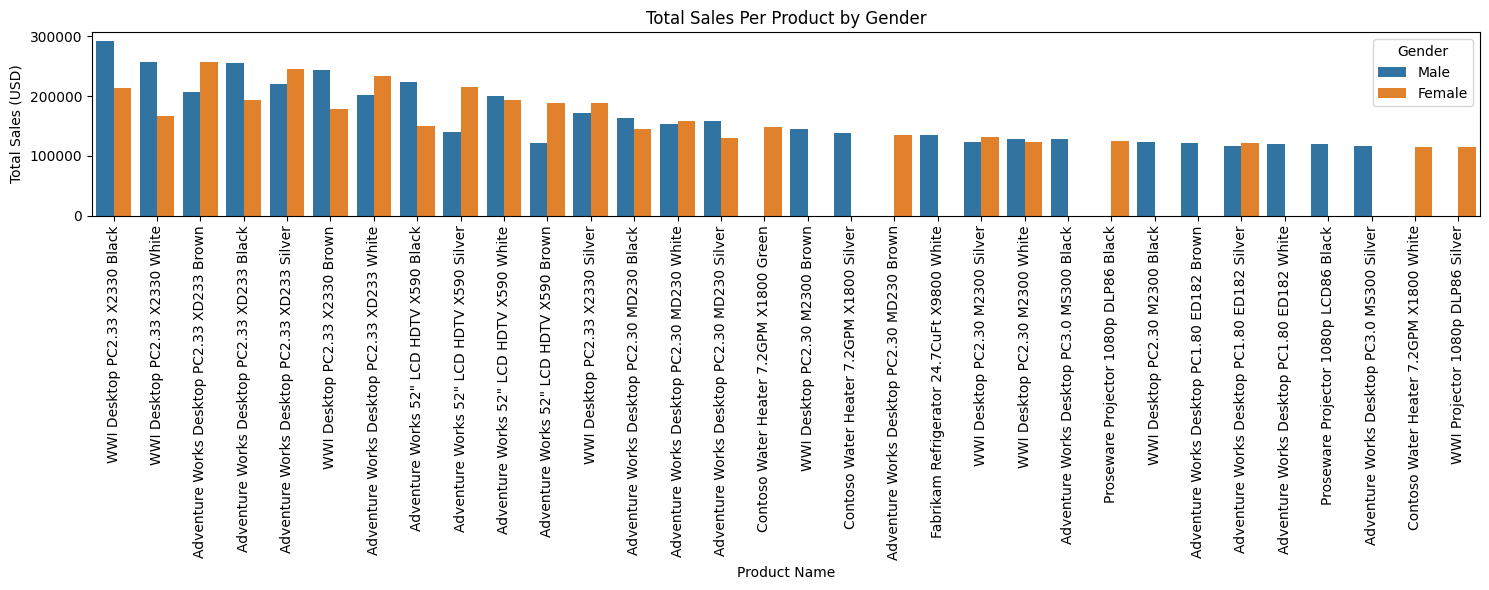

In [40]:
# Markteing Stratgies by Gender

# Group by 'Gender' and 'Product Name', then sum the 'Total Sales USD'
gender_product_sales = merged_dataset.groupby(['Gender', 'Product Name'])['Total Sales USD'].sum().reset_index()

# Get the top 50 products by total sales (regardless of gender)
top_gender_product_sales = gender_product_sales.nlargest(50, 'Total Sales USD')

# Plot the data
plt.figure(figsize=(15, 6))
sns.barplot(x='Product Name', y='Total Sales USD', hue='Gender', data=top_gender_product_sales)
plt.title('Total Sales Per Product by Gender')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


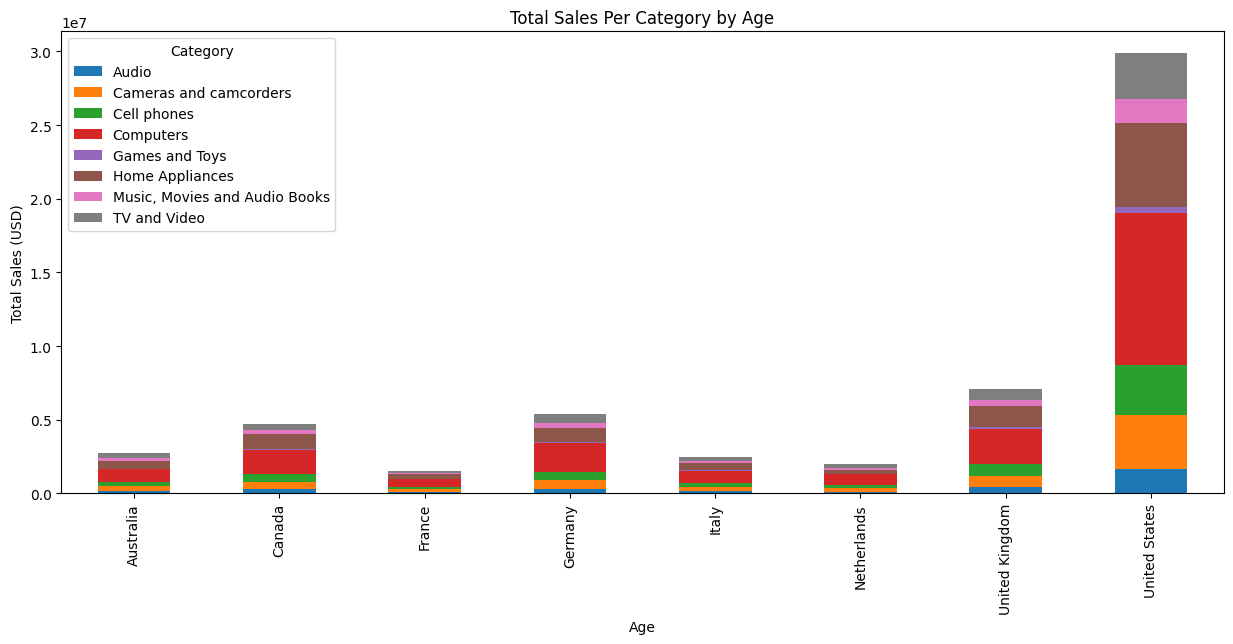

In [42]:
# Markteing Stratgies by customer_country

# Group by 'customer_country' and 'Category', then sum the 'Total Sales USD'
age_category = merged_dataset.groupby(['customer_country', 'Category'])['Total Sales USD'].sum().unstack()

# Plot the data
age_category.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Total Sales Per Category by Age')
plt.xlabel('Age')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Category')
plt.show()

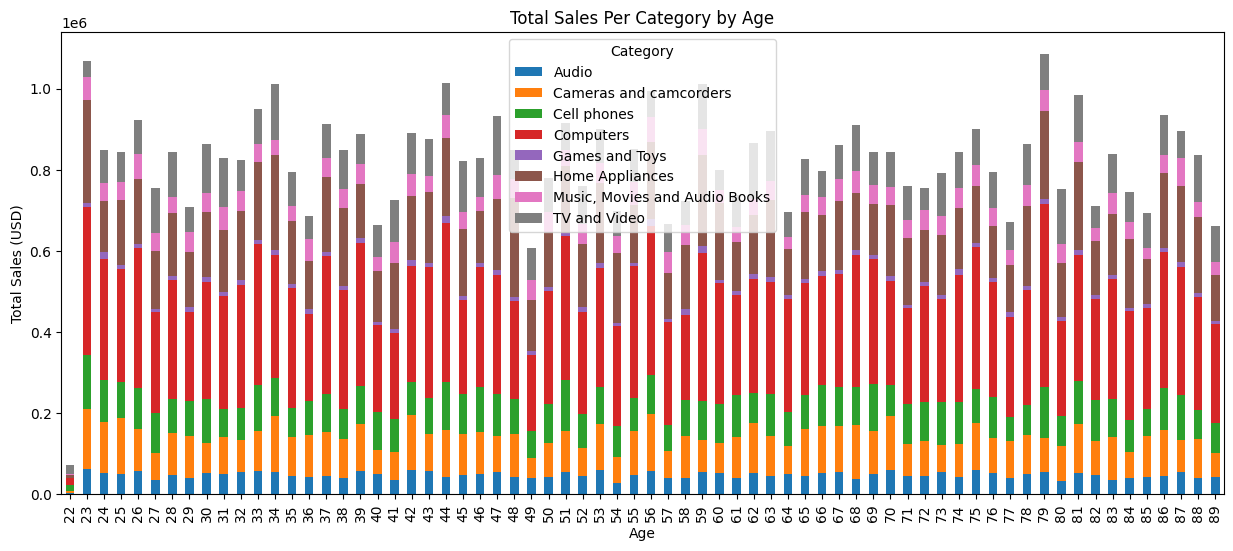

In [45]:
# Markteing Stratgies by Age

# Group by 'Age' and 'Category', then sum the 'Total Sales USD'
age_category = merged_dataset.groupby(['Age', 'Category'])['Total Sales USD'].sum().unstack()

# Plot the data
age_category.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Total Sales Per Category by Age')
plt.xlabel('Age')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Category')
plt.show()

Currency Analysis

In [31]:
# Curreny Impact
merged_dataset['currency impact']=merged_dataset['Total Sales USD']*merged_dataset['Exchange']
currency_impact=merged_dataset.groupby('Currency Code').agg({'Total Sales USD':'sum','currency impact':'sum'}).reset_index()
currency_impact

,Currency Code,Total Sales USD,currency impact
0,AUD,2708137.61,3.779716e+06
1,CAD,4724334.63,6.216370e+06
2,EUR,11367288.06,1.003222e+07
3,GBP,7084088.12,5.449533e+06
4,USD,29871631.17,2.987163e+07


In [25]:
# 'store_country'  VS 'customer_country'

Customer_prfered = pd.crosstab(merged_dataset['store_country'],merged_dataset['customer_country'])
Customer_prfered


customer_country,Australia,Canada,France,Germany,Italy,Netherlands,United Kingdom,United States
store_country,,,,,,,,
Australia,2248,0,0,0,0,0,0,0
Canada,0,4206,0,0,0,0,0,0
France,0,0,1387,0,0,0,0,0
Germany,0,0,0,4662,0,0,0,0
Italy,0,0,0,0,2201,0,0,0
Netherlands,0,0,0,0,0,1817,0,0
Online,693,1209,343,1294,484,433,1497,7212
United Kingdom,0,0,0,0,0,0,6643,0
United States,0,0,0,0,0,0,0,26555


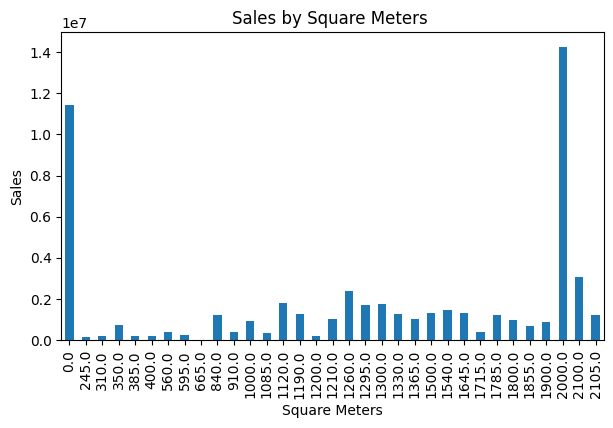

In [22]:
# Group by  'Square Meters', then sum the 'Total Sales USD'
product_quantity = merged_dataset.groupby('Square Meters')['Total Sales USD'].sum()

# Plot the data using seaborn
product_quantity.plot(kind='bar',figsize=(7,4))
plt.title('Sales by Square Meters ')
plt.xlabel('Square Meters')
plt.ylabel('Sales')
plt.show()

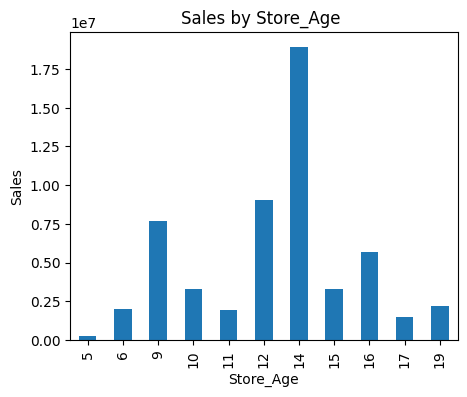

In [18]:
# Group by  'Store_Age', then sum the 'Total Sales USD'
product_quantity = merged_dataset.groupby('Store_Age')['Total Sales USD'].sum()

# Plot the data using seaborn
product_quantity.plot(kind='bar',figsize=(5,4))
plt.title('Sales by Store_Age ')
plt.xlabel('Store_Age')
plt.ylabel('Sales')
plt.show()

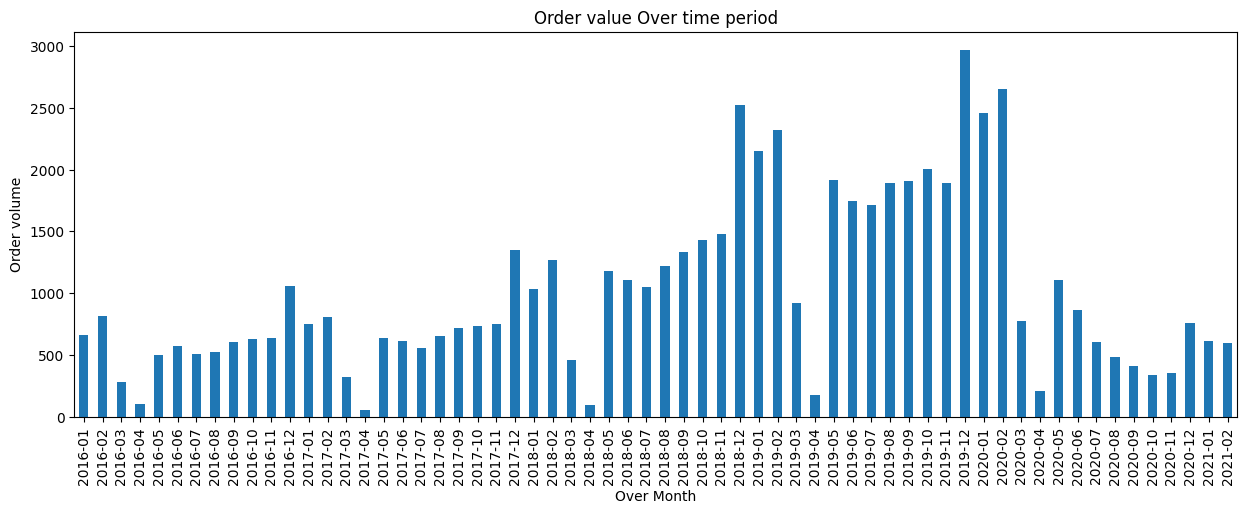

In [17]:
# 'Order volume' over time period
order_volume=merged_dataset.groupby(merged_dataset['Order Date'].dt.to_period('M'))['Order Number'].count()
order_volume.plot(kind='bar',figsize=(15,5))
plt.title('Order value Over time period')
plt.xlabel('Over Month')
plt.ylabel('Order volume')
plt.show()

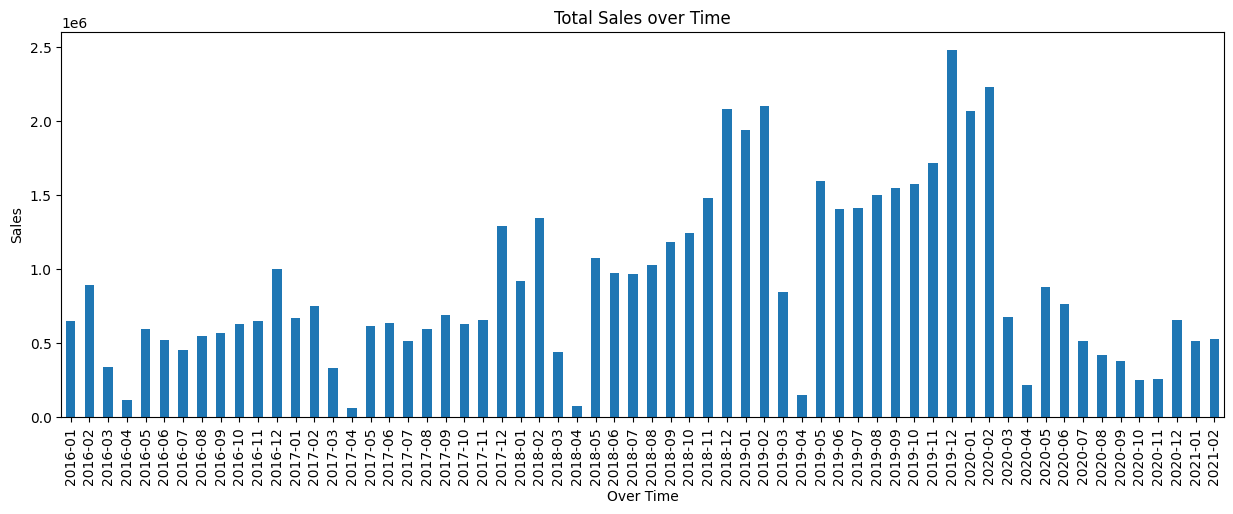

In [34]:
# 'Order Date' with 'Total Sales USD'
yearly_sales=merged_dataset.groupby(merged_dataset['Order Date'].dt.to_period('M'))['Total Sales USD'].sum()
yearly_sales.plot(kind='bar',figsize=(15,5))
plt.title('Total Sales over Time')
plt.xlabel('Over Time')
plt.ylabel('Sales')
plt.show()

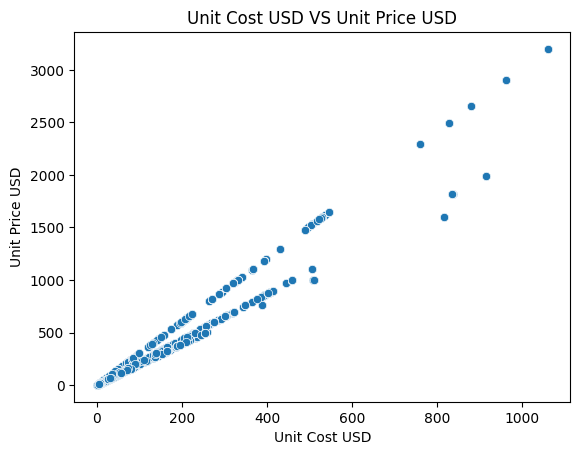

In [15]:
# 'Unit Cost USD' and 'Unit Price USD'
sns.scatterplot(data=merged_dataset,x='Unit Cost USD',y='Unit Price USD')
plt.title('Unit Cost USD VS Unit Price USD')
plt.xlabel('Unit Cost USD')
plt.ylabel('Unit Price USD')
plt.show()

Currency Exchange 

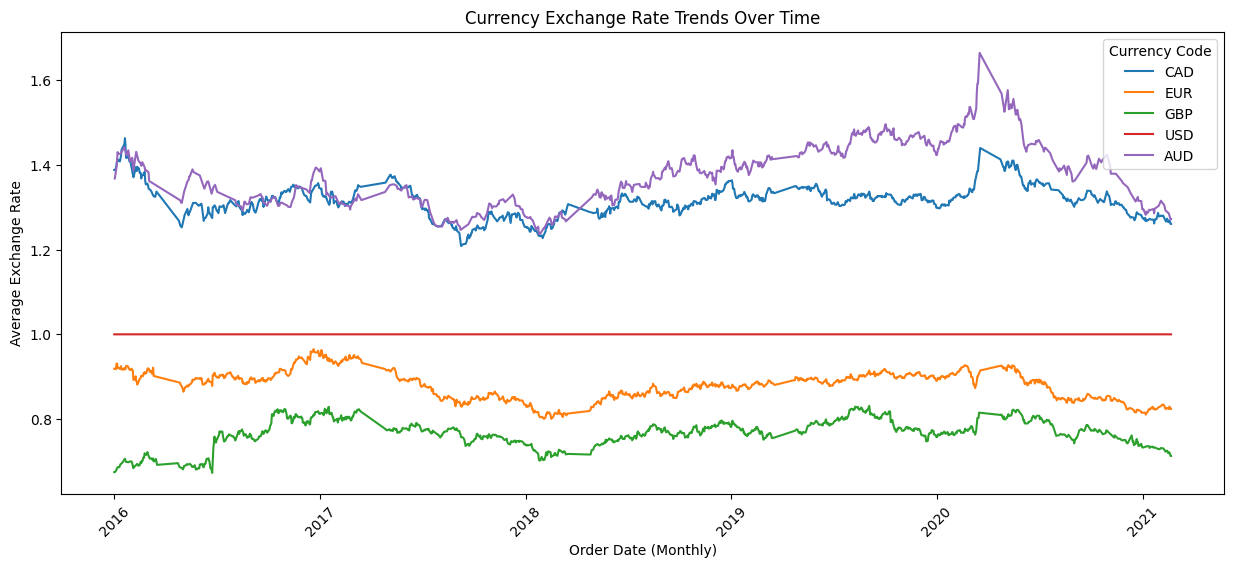

In [73]:
# Group by 'Order Period' and 'Currency Code', then calculate the average exchange rate
currency_trends = merged_dataset.groupby(['Order Date', 'Currency Code'])['Exchange'].first().reset_index()

# Visualize the exchange rate trends
plt.figure(figsize=(15, 6))
sns.lineplot(data=currency_trends, x='Order Date', y='Exchange', hue='Currency Code')
plt.title('Currency Exchange Rate Trends Over Time')
plt.xlabel('Order Date (Monthly)')
plt.xticks(rotation=45)
plt.ylabel('Average Exchange Rate')
plt.show()


Store Analysis

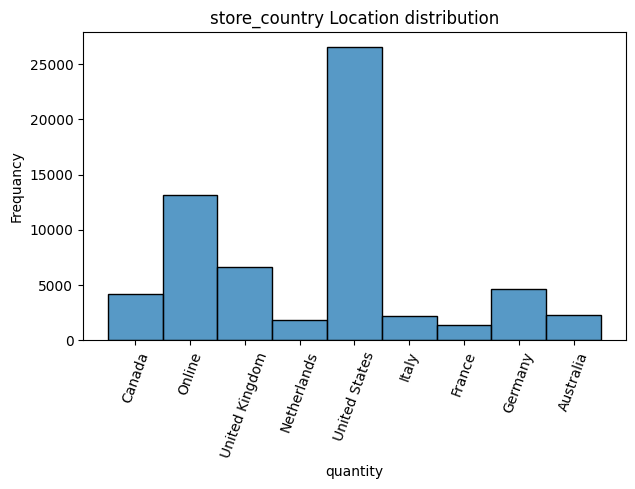

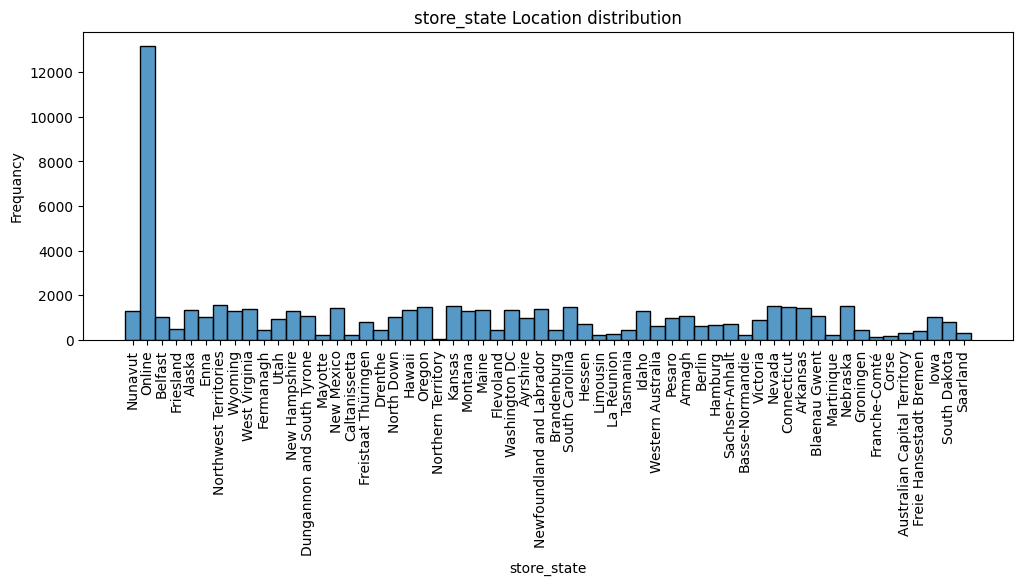

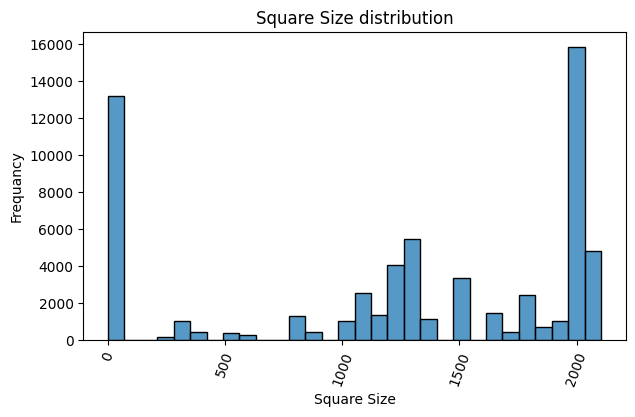

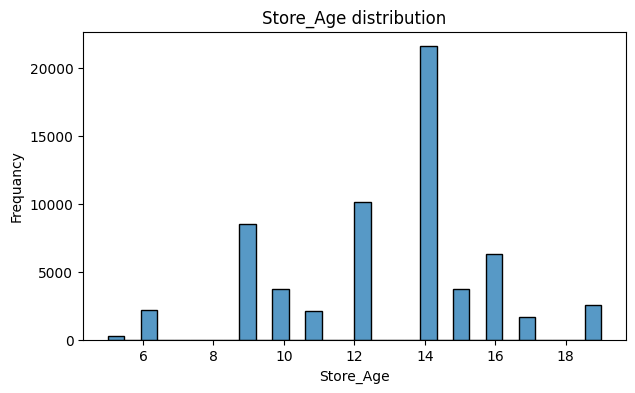

In [60]:
#store_country distribution
plt.figure(figsize=(7,4))
sns.histplot(merged_dataset['store_country'],bins=40)
plt.title('store_country Location distribution')
plt.xlabel('quantity')
plt.ylabel('Frequancy')
plt.xticks(rotation=70)
plt.show()

#store_state distribution
plt.figure(figsize=(12,4))
sns.histplot(merged_dataset['store_state'],bins=30)
plt.title('store_state Location distribution')
plt.xlabel('store_state')
plt.ylabel('Frequancy')
plt.xticks(rotation=90)
plt.show()

#Square Meters distribution
plt.figure(figsize=(7,4))
sns.histplot(merged_dataset['Square Meters'],bins=30)
plt.title('Square Size distribution')
plt.xlabel('Square Size')
plt.ylabel('Frequancy')
plt.xticks(rotation=70)
plt.show()

#Store_Age Meters distribution
plt.figure(figsize=(7,4))
sns.histplot(merged_dataset['Store_Age'],bins=30)
plt.title('Store_Age distribution')
plt.xlabel('Store_Age')
plt.ylabel('Frequancy')
plt.show()



Product Analysis

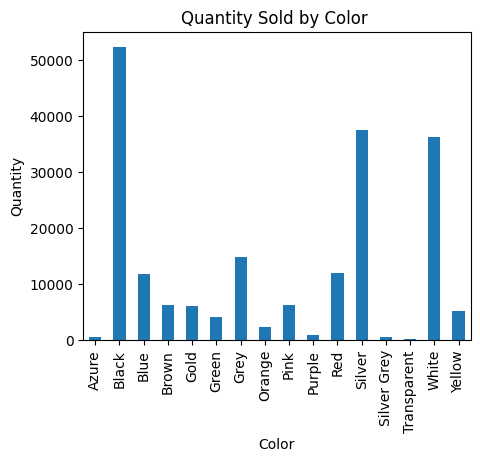

In [14]:
# Group by  'Color', then sum the 'Quantity'
product_quantity = merged_dataset.groupby('Color')['Quantity'].sum()

# Plot the data using seaborn
product_quantity.plot(kind='bar',figsize=(5,4))
plt.title('Quantity Sold by Color ')
plt.xlabel('Color')
plt.ylabel('Quantity')
plt.show()

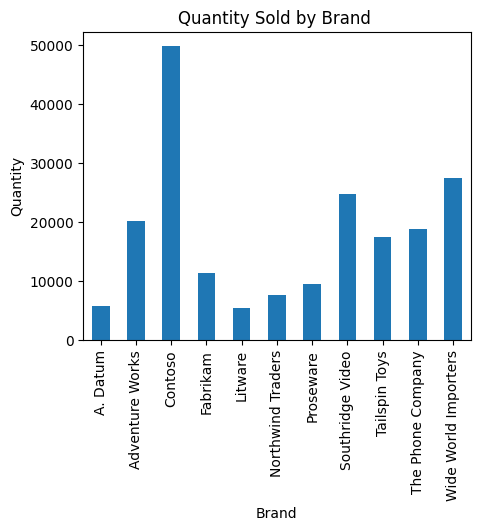

In [13]:
# Group by  'Brand', then sum the 'Quantity'
product_quantity = merged_dataset.groupby('Brand')['Quantity'].sum()

# Plot the data using seaborn
product_quantity.plot(kind='bar',figsize=(5,4))
plt.title('Quantity Sold by Brand ')
plt.xlabel('Brand')
plt.ylabel('Quantity')
plt.show()

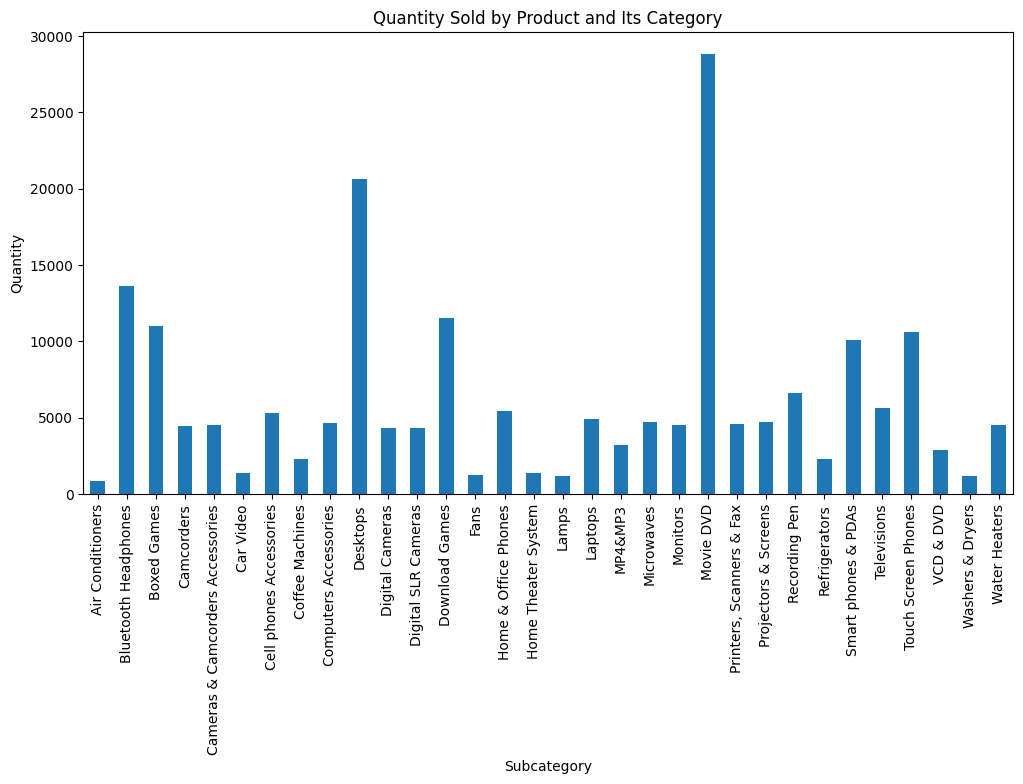

In [47]:
# Group by  'Subcategory', then sum the 'Quantity'
product_quantity = merged_dataset.groupby('Subcategory')['Quantity'].sum()

# Plot the data using seaborn
product_quantity.plot(kind='bar',figsize=(12,6))
plt.title('Quantity Sold by Product and Its Category')
plt.xlabel('Subcategory')
plt.ylabel('Quantity')
plt.show()

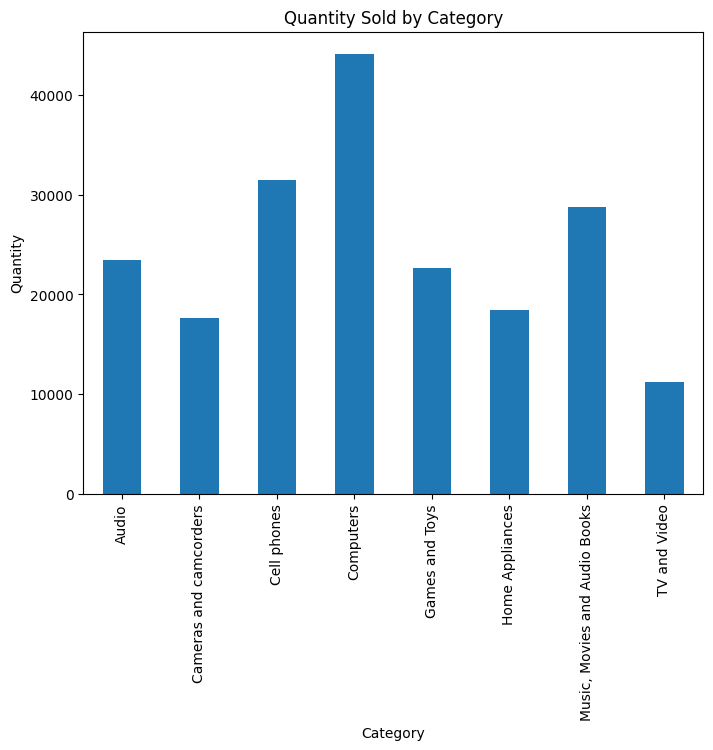

In [49]:
# Group by  'Category', then sum the 'Quantity'
product_quantity = merged_dataset.groupby('Category')['Quantity'].sum()

# Plot the data using seaborn
product_quantity.plot(kind='bar',figsize=(8,6))
plt.title('Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()


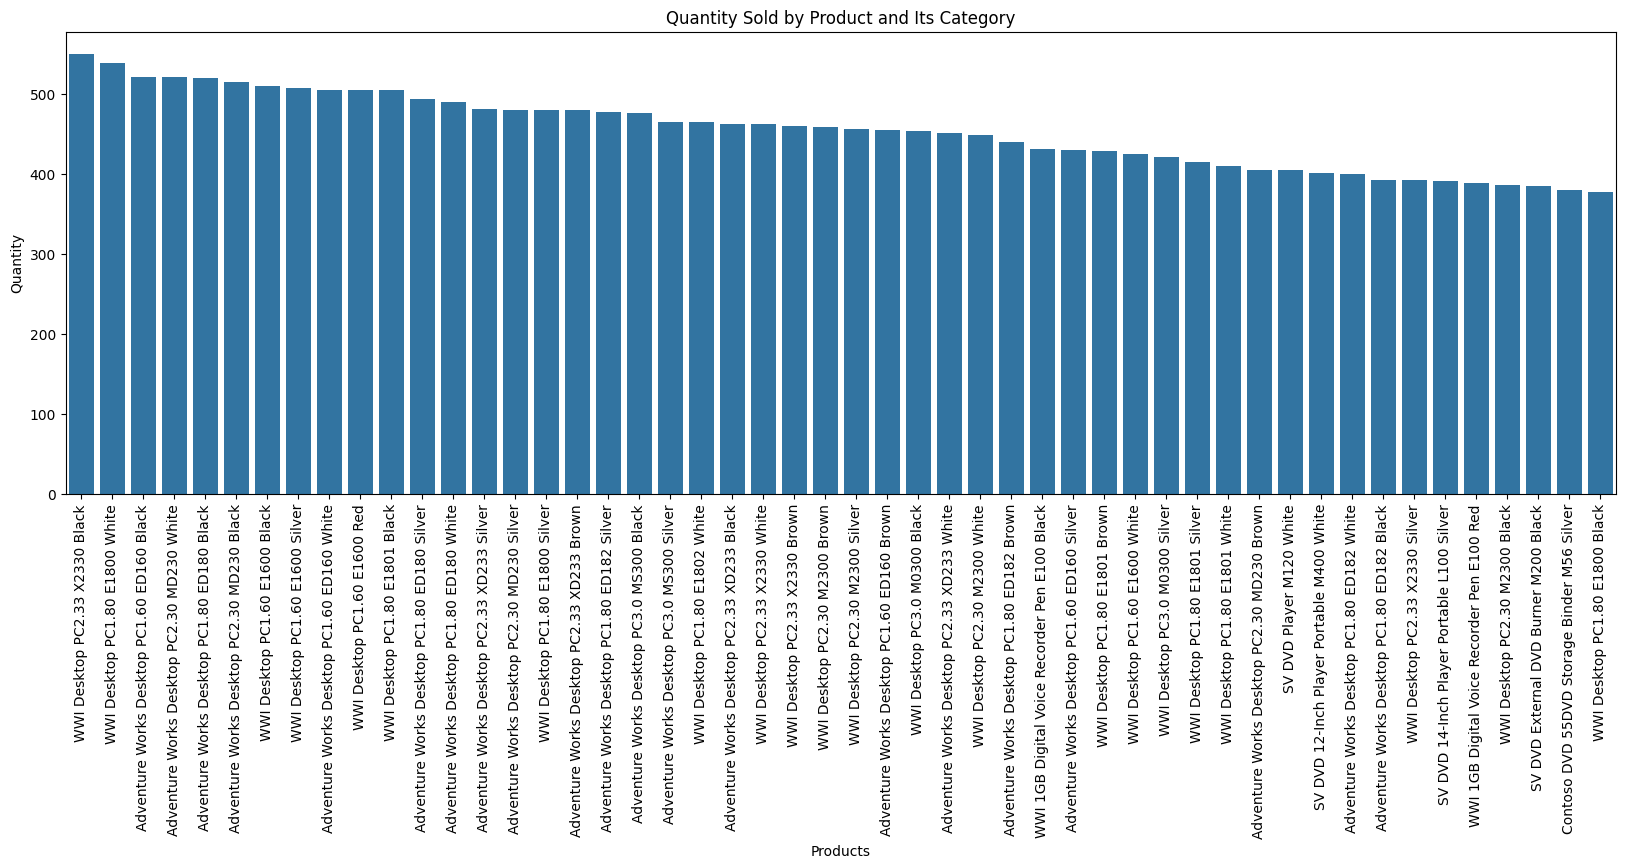

In [44]:
# Group by 'Product Name' and  sum the 'Quantity'
product_quantity = merged_dataset.groupby('Product Name')['Quantity'].sum().nlargest(50)

# Plot the data using seaborn
plt.figure(figsize=(20,6))
sns.barplot(product_quantity)
plt.title('Quantity Sold by Product Name')
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.xticks(rotation=90)  # Rotate product names for better readability
plt.show()


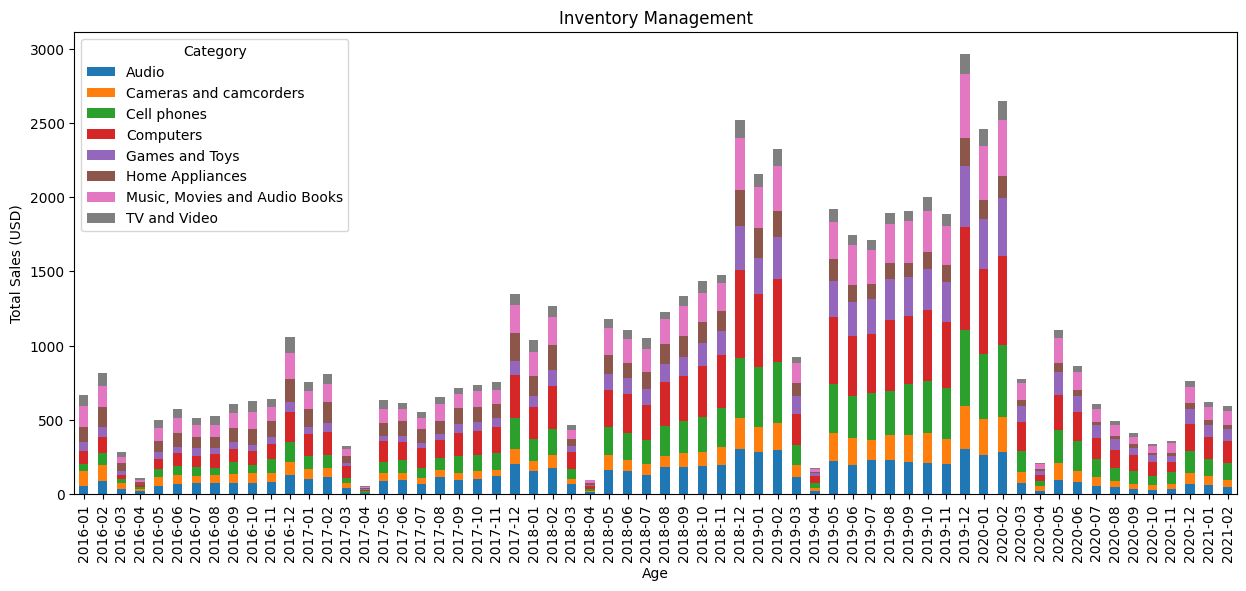

In [29]:
#Inventory Management

# Group by 'Age' and 'Category', then sum the 'Order Number'
inventory = merged_dataset.groupby([merged_dataset['Order Date'].dt.to_period('M'), 'Category'])['Order Number'].count().unstack()

# Plot the data
inventory.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Inventory Management')
plt.xlabel('Age')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Category')
plt.show()



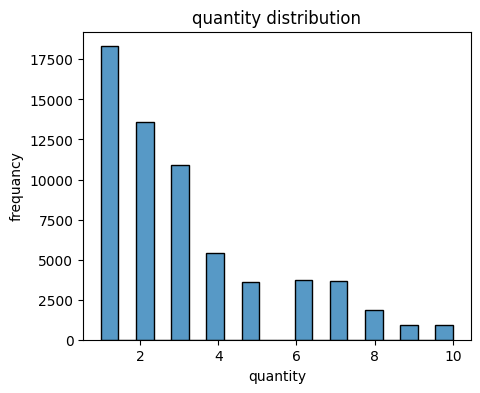

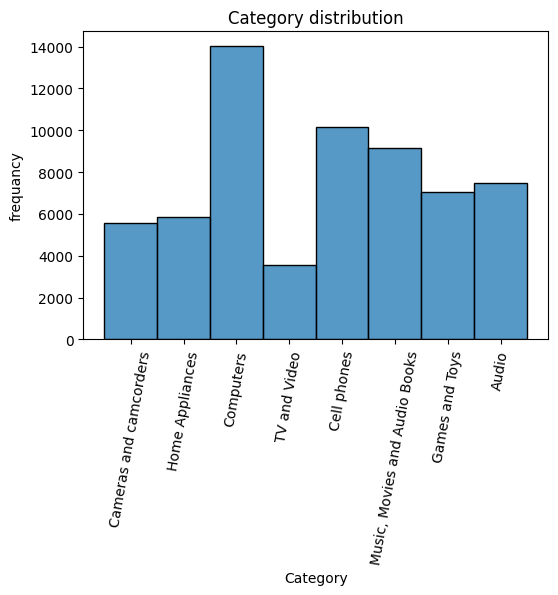

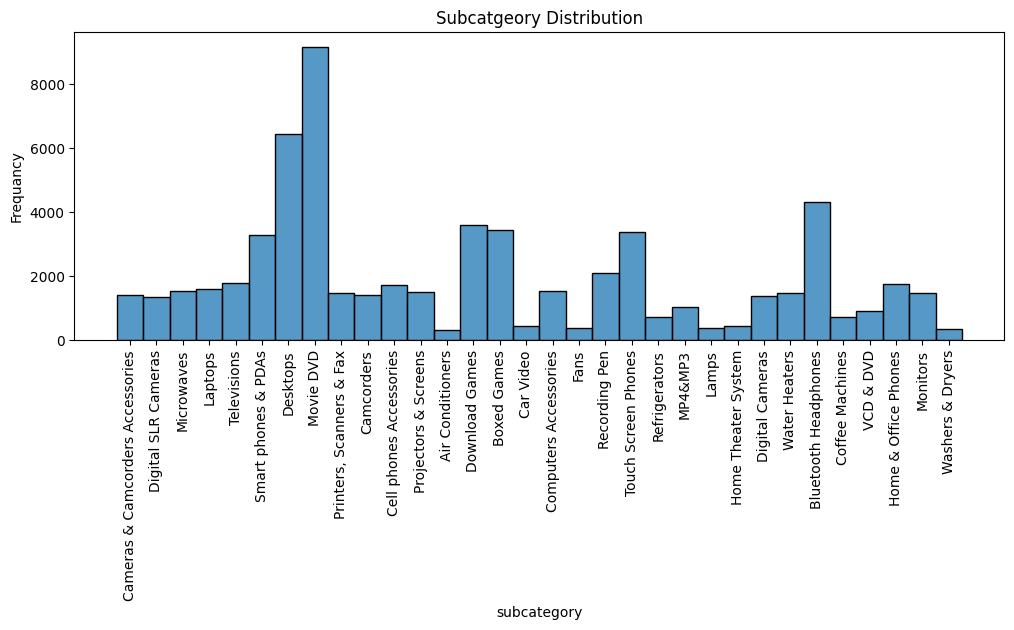

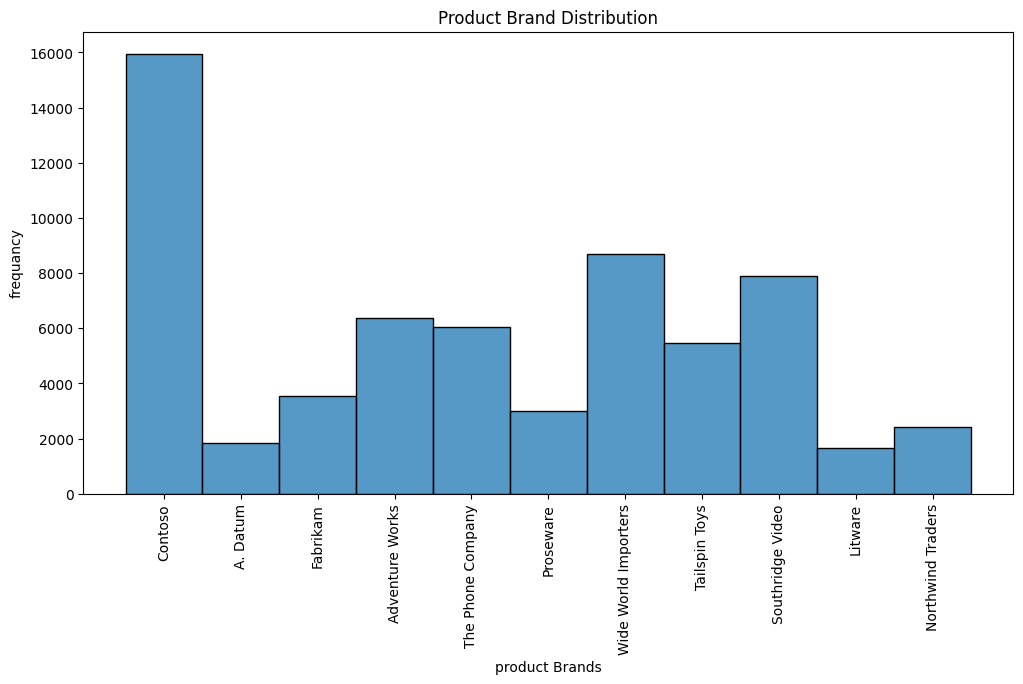

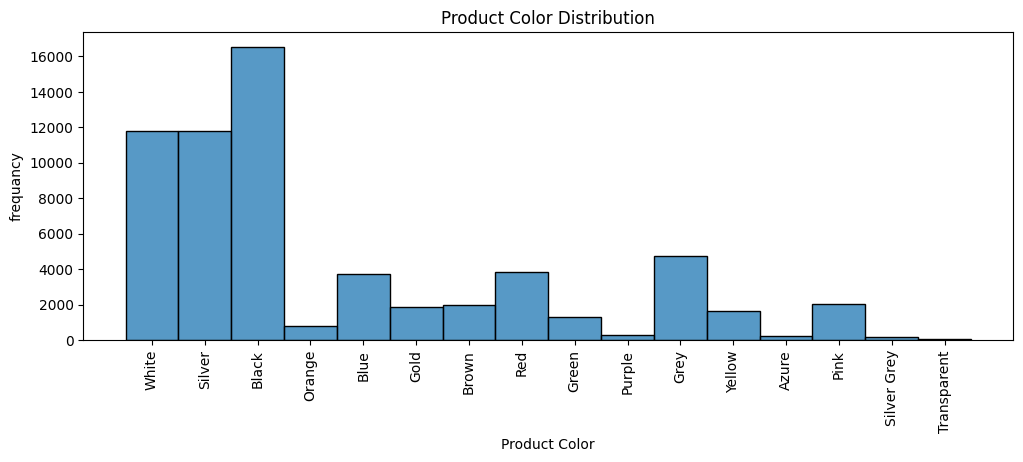

In [28]:
#Quantity distribution
plt.figure(figsize=(5,4))
sns.histplot(merged_dataset['Quantity'],bins=20)
plt.title('quantity distribution')
plt.xlabel('quantity')
plt.ylabel('frequancy')
plt.show()

#Catageory Distribution
plt.figure(figsize=(6,4))
sns.histplot(merged_dataset['Category'],bins=20)
plt.title('Category distribution')
plt.xlabel('Category')
plt.ylabel('frequancy')
plt.xticks(rotation=80)
plt.show()


#sub-category Distribution
plt.figure(figsize=(12,4))
sns.histplot(merged_dataset['Subcategory'],bins=20)
plt.title('Subcatgeory Distribution')
plt.xlabel('subcategory')
plt.ylabel('Frequancy')
plt.xticks(rotation=90)
plt.show()


#Product Brand Distribution
plt.figure(figsize=(12,6))
sns.histplot(merged_dataset['Brand'],bins=20)
plt.title('Product Brand Distribution')
plt.xlabel('product Brands')
plt.ylabel('frequancy')
plt.xticks(rotation=90)
plt.show()


#Product color Distribution
plt.figure(figsize=(12,4))
sns.histplot(merged_dataset['Color'],bins=20)
plt.title('Product Color Distribution')
plt.xlabel('Product Color')
plt.ylabel('frequancy')
plt.xticks(rotation=90)
plt.show()


Customer Analysis

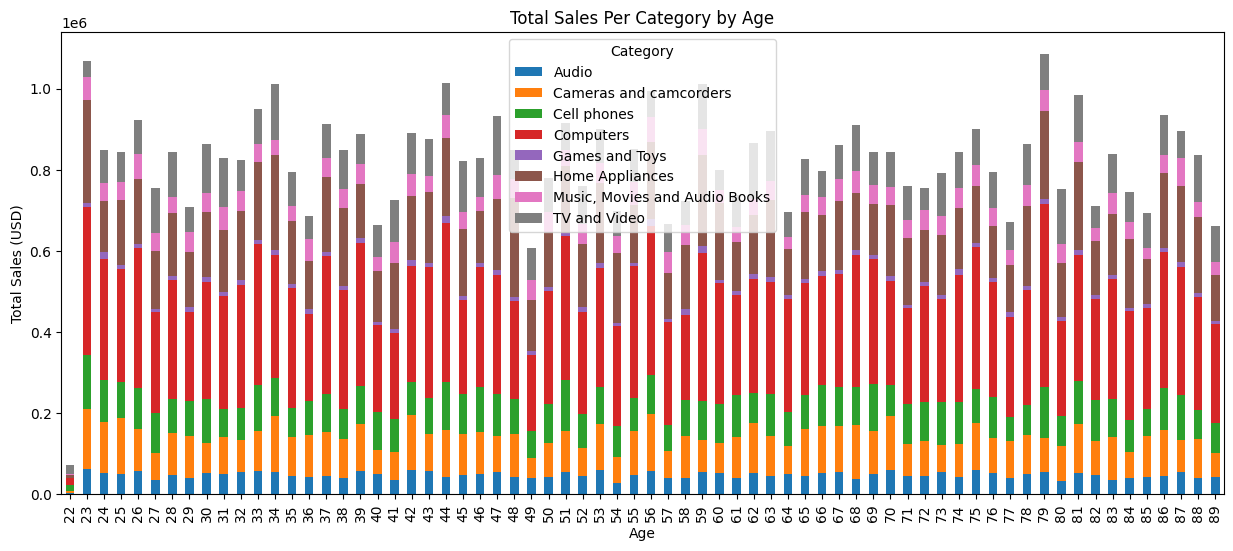

In [18]:
#Taegeting Marketing

# Group by 'Age' and 'Category', then sum the 'Total Sales USD'
age_category = merged_dataset.groupby(['Age', 'Category'])['Total Sales USD'].sum().unstack()

# Plot the data
age_category.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Total Sales Per Category by Age')
plt.xlabel('Age')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Category')
plt.show()

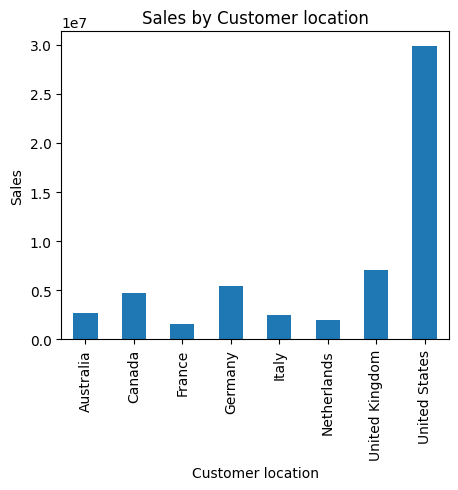

In [15]:
#Total sales by Customer location
sales_by_gender=merged_dataset.groupby('customer_country')['Total Sales USD'].sum()
sales_by_gender.plot(kind='bar',figsize=(5,4))
plt.title('Sales by Customer location')
plt.xlabel('Customer location')
plt.ylabel('Sales')
plt.show()

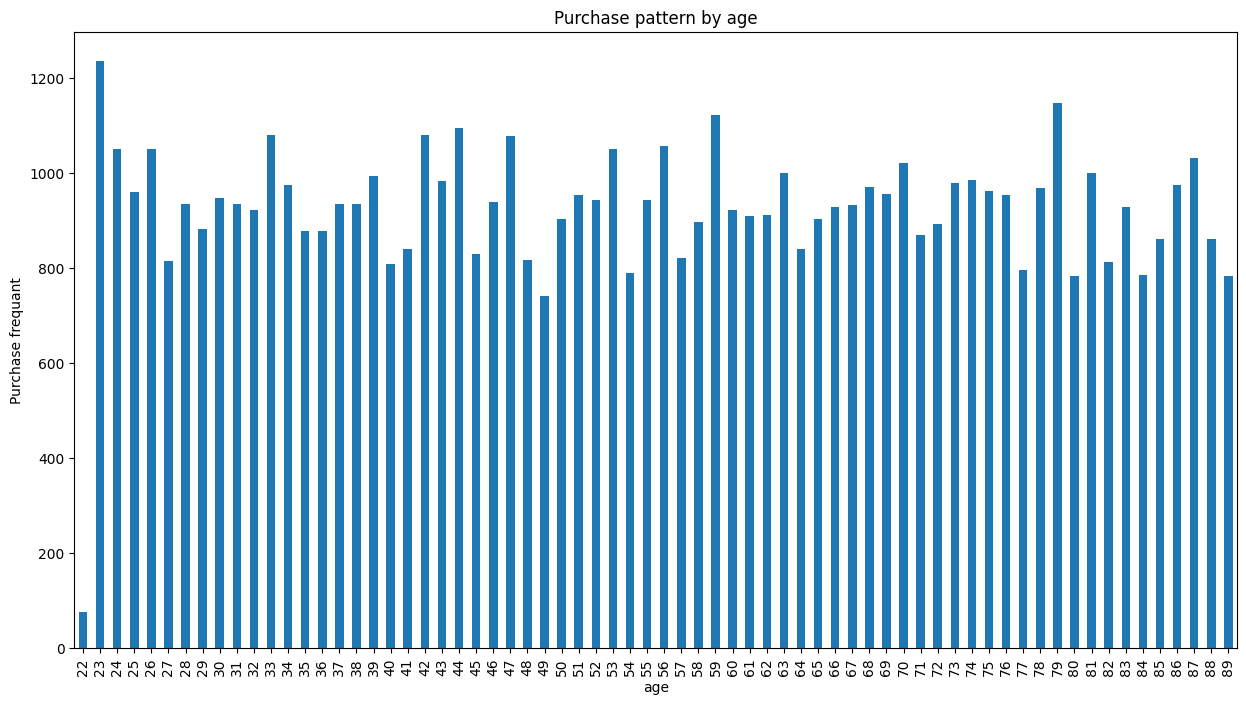

In [14]:
# Purchase pattern by age group
Age_by_gender=merged_dataset.groupby('Age')['Order Number'].count()
Age_by_gender.plot(kind='bar',figsize=(15,8))
plt.title('Purchase pattern by age')
plt.xlabel('age')
plt.ylabel('Purchase frequant')
plt.show()

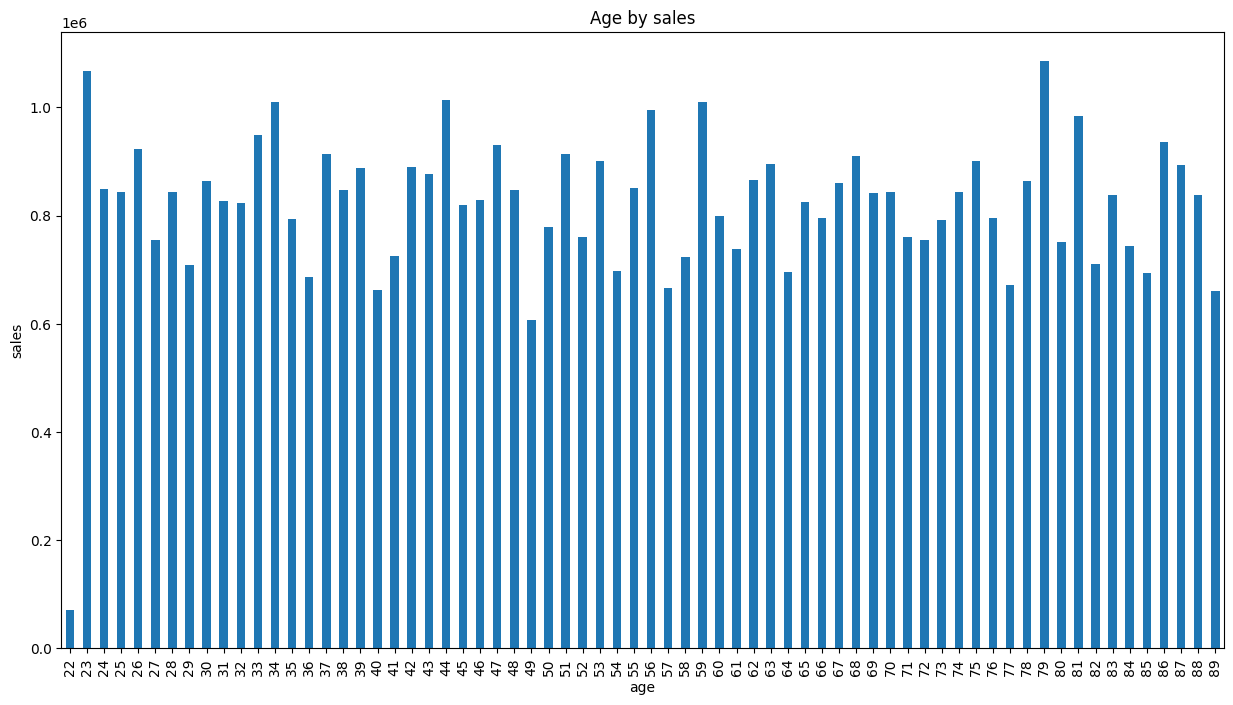

In [33]:
# Age by Sales
Age_by_gender=merged_dataset.groupby('Age')['Total Sales USD'].sum()
Age_by_gender.plot(kind='bar',figsize=(15,8))
plt.title('Age by sales')
plt.xlabel('age')
plt.ylabel('sales')
plt.show()

In [13]:
# Age by Gender
Age_by_gender=pd.crosstab(merged_dataset['Age'],merged_dataset['Gender'])
Age_by_gender


Gender,Female,Male
Age,,
22,34,42
23,593,643
24,589,462
25,478,482
26,457,594
...,...,...
85,444,418
86,515,461
87,481,551


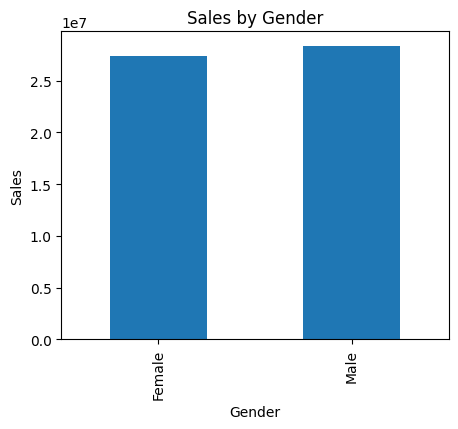

In [27]:
#Total sales by Gender
sales_by_gender=merged_dataset.groupby('Gender')['Total Sales USD'].sum()
sales_by_gender.plot(kind='bar',figsize=(5,4))
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Sales')
plt.show()

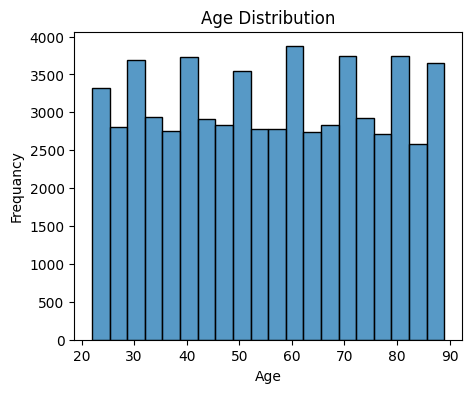

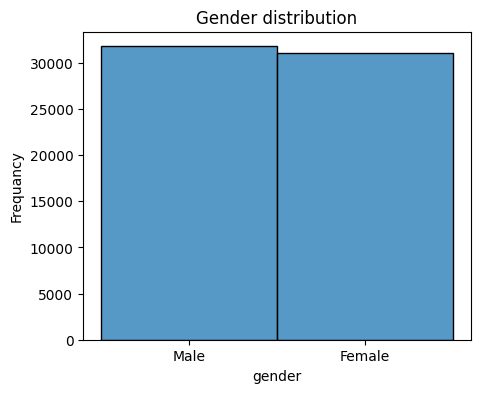

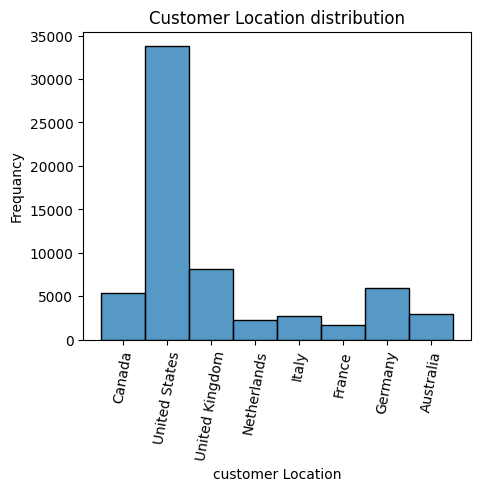

In [12]:
#Age Distribution
plt.figure(figsize=(5,4))
sns.histplot(merged_dataset['Age'],bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequancy')
plt.show()

#Gender Distribution
plt.figure(figsize=(5,4))
sns.histplot(merged_dataset['Gender'],bins=20)
plt.title('Gender distribution')
plt.xlabel('gender')
plt.ylabel('Frequancy')
plt.show()


# Customer country distribution
plt.figure(figsize=(5,4))
sns.histplot(merged_dataset['customer_country'],bins=20)
plt.title('Customer Location distribution')
plt.xlabel('customer Location')
plt.ylabel('Frequancy')
plt.xticks(rotation=80)
plt.show()


